# Tutorial for the method used in
### "Data-driven reconstruction of spectral conductivity and chemical potential using thermoelectric transport properties"

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# load PyTorch modules
import torch

def plotter_toy(data,data2,data3,Nsample):
    #loss function
    epoch=data3.shape[0]
    plt.rcParams['figure.figsize'] = (8,6)
    plt.rcParams.update({'font.size': 30})
    plt.plot(data3,linewidth=4,color='red')
    plt.yscale('log')
    if Nsample==1:
        plt.yticks([1e-2,1e-4,1e-6,1e-8])
    else:
        plt.yticks([1e-2,1e-4,1e-6])
    plt.xlabel('epoch')
    plt.ylabel('Loss')
    plt.show()
    #toy model
    y=2*np.exp(-((data[0]-2))**2)+np.exp(-((data[0]+2))**2)
    if Nsample==1:
        Wc=np.max(data[0])
        #set the origin
        dx=0.0
    else:
        Wc=np.max(data[0])//2
        dx=-data2[0,5,0]
    #Plot spectral conductivity
    plt.rcParams['figure.figsize'] = (8,6)
    plt.rcParams.update({'font.size': 30})
    plt.plot(data[0]+dx,data[1],'bs',markersize=8,label='NN result')
    plt.plot(data[0],y,'k--',linewidth=3.0,label='toy model')
    plt.xlim(-Wc-0.5,Wc+0.5)
    plt.yticks([0.0,0.5,1.0,1.5,2])
    plt.xlabel(r'$\mathcal{E}$')
    plt.ylabel('sigma(E)')
    plt.legend()
    plt.show()
    #chemical potential
    if Nsample>1:
        colorlist=['cyan','magenta','lime','red']
        mu_list=np.zeros((Nsample,data2[0,0].size))
        mu_list[0]=0.5*data2[0,0]**2
        mu_list[1]=0.2-1.5*data2[0,0]**2
        mu_list[2]=0.3+1.*data2[0,0]**2
        for i in range(Nsample):
            plt.plot(data2[0,0],data2[i,5]+dx,'-',color=colorlist[i],markersize=6,linewidth=6.0,label='NN result'+str(i))
            plt.plot(data2[0,0],mu_list[i],'--',color=colorlist[i],linewidth=10.0,alpha=0.4,label='toy model'+str(i))
        plt.xlabel(r'$\xi$')
        plt.ylabel(r'$\mu$')
        plt.legend()
        plt.show()
    #plot L11 and L12
    for i in range(Nsample):
        #L11
        plt.plot(data2[i,0],data2[i,3],'-s',label='NN result'+str(i))
        plt.plot(data2[i,0],data2[i,1],'--',linewidth=3.0,label='toy model'+str(i))
        plt.xlabel(r'$\xi$')
        plt.ylabel(r'$L_{11}$')
        plt.legend()
        plt.show()
    for i in range(Nsample):  
        #L12
        plt.plot(data2[i,0],data2[i,4],'-s',label='NN result'+str(i))
        plt.plot(data2[i,0],data2[i,2],'--',linewidth=3.0,label='toy model'+str(i))
        plt.xlabel(r'$\xi$')
        plt.ylabel(r'$L_{12}$')
        plt.legend()
        plt.show()

def plotter(data,data2,data3,Nsample,Wc,name):
    kB=1.38/10**23
    Tmax=278.8
    charge=1.602/10**19
    escale=Tmax*kB/charge
    
    #loss function 
    epoch=data3.shape[0]
    plt.rcParams['figure.figsize'] = (8,6)
    plt.rcParams.update({'font.size': 30})
    plt.plot(data3,linewidth=4,color='red')
    plt.yscale('log')
    #plt.yticks([1e-1,1e-2,1e-3,1e-4])
    plt.xlabel('epoch')
    plt.ylabel('Loss')
    plt.show()
    #set the zero energy at average of chemical potential at Tmax
    dx=-sum(data2[:,5,-1])/Nsample
    
    #Plot spectral conductivity computed by NN
    plt.rcParams['figure.figsize'] = (8,6)
    plt.rcParams.update({'font.size': 30})
    plt.plot((data[0]+dx)*escale,data[1],'b-s',markersize=8,label='NN result')
    #plt.plot((data[0]+dx)*escale,data[1]*0,'k-')
    plt.xlim((-Wc-0.5)*escale,(Wc+0.5)*escale)
    plt.xlabel(r'$\mathcal{E}$')
    plt.ylabel('sigma(E)')
    #plt.legend()
    plt.show()
    
    #chemical potential
    plt.rcParams['figure.figsize'] = (6,8)
    plt.rcParams.update({'font.size': 50})
    colorlist=["red","orange","brown","purple","cyan","green","lime"]
    marklist=["s", "h","^", "p", "*", "D", "d"]
    for i in range(Nsample):
        plt.plot((data2[i,5]+dx)*escale,Tmax*data2[0,0],linestyle='none',marker=marklist[i],
             color=colorlist[i],markersize=12,alpha=1,label='NN result'+str(i))
    plt.xticks([-0.05,0.0,0.05],[-0.05,0,0.05])
    plt.tick_params('both', length=15, width=5, which='major')
    plt.xlabel(r'$\xi$')
    plt.ylabel(r'$\mu$')
    #plt.legend()
    plt.show()
    
    #plot L11 and L12
    plt.rcParams['figure.figsize'] = (8,6)
    plt.rcParams.update({'font.size': 30})
    for i in range(Nsample):
        #L11
        plt.plot(Tmax*data2[i,0],data2[i,3],'-',marker=marklist[i],color=colorlist[i],markersize=10,linewidth=3,label='NN result'+str(i))
        plt.plot(Tmax*data2[i,0],data2[i,1],'--',linewidth=8.0,color=colorlist[i],alpha=0.4,label='experiment sample'+str(i))
        plt.xticks([0.,50,100,150,200,250])
        plt.xlabel(r'$\xi$')
        plt.ylabel(r'$L_{11}$')
        plt.legend()
        plt.show()
    for i in range(Nsample):  
        #L12
        plt.plot(Tmax*data2[i,0],data2[i,4],'-',marker=marklist[i],color=colorlist[i],markersize=10,linewidth=3,label='NN result'+str(i))
        plt.plot(Tmax*data2[i,0],data2[i,2],'--',linewidth=8.0,color=colorlist[i],alpha=0.4,label='experiment sample'+str(i))
        plt.xticks([0.,50,100,150,200,250])
        plt.xlabel(r'$\xi$')
        plt.ylabel(r'$L_{12}$')
        plt.legend()
        plt.show()    


def L11_L12(inp,cond,mu,temp,Wc):
    nsite=temp.shape[0]
    L11=np.zeros(nsite)
    L12=np.zeros(nsite)
    for j in range(nsite):

        newX=np.linspace((-Wc*temp[j]).item(),(Wc*temp[j]).item(),1001)
        newX=newX+mu[j]
        newY=np.interp(newX,inp,cond)
        newX=newX-mu[j]          
        newf1=newY*np.exp((newX)/temp[j])/(np.exp((newX)/temp[j])+1)**2/temp[j] 
        newf2=newX*newY*np.exp((newX)/temp[j])/(np.exp((newX)/temp[j])+1)**2/temp[j] 
        L11[j]=np.trapz(newf1,newX)
        L12[j]=-np.trapz(newf2,newX)
    return L11,L12

def L22(inp,cond,mu,temp,Wc):
    nsite=temp.shape[0]
    L22=np.zeros(nsite)
    
    for j in range(nsite):

        newX=np.linspace((-Wc*temp[j]).item(),(Wc*temp[j]).item(),101)
        newX=newX+mu[j]
        newY=np.interp(newX,inp,cond)
        newX=newX-mu[j]          
        newf1=newX**2*newY*np.exp((newX)/temp[j])/(np.exp((newX)/temp[j])+1)**2/temp[j] 
        L22[j]=np.trapz(newf1,newX)
    return L22
    
from platform import python_version
print('python version: ',python_version())
print('pytorch version',torch.__version__) 

python version:  3.8.8
pytorch version 1.12.0


## Toy model with Ns=1

In [2]:
%matplotlib notebook
%run -i main_toy1.py

Using device: cpu
[epoch 0 timing: ]
Elapsed: 2.7246029376983643
--------------------
[epoch 100 timing: ]
Elapsed: 2.5711700916290283
--------------------
[epoch 200 timing: ]
Elapsed: 2.5005335807800293
--------------------
[epoch 300 timing: ]
Elapsed: 2.6480467319488525
--------------------
[epoch 400 timing: ]
Elapsed: 2.537156105041504
--------------------
[epoch 500 timing: ]
Elapsed: 2.565603017807007
--------------------
[epoch 600 timing: ]
Elapsed: 2.5650784969329834
--------------------
[epoch 700 timing: ]
Elapsed: 2.639071226119995
--------------------
[epoch 800 timing: ]
Elapsed: 2.5690197944641113
--------------------
[epoch 900 timing: ]
Elapsed: 2.565166473388672
--------------------
[epoch 1000 timing: ]
Elapsed: 2.656019687652588
--------------------
[epoch 1100 timing: ]
Elapsed: 2.55879282951355
--------------------
[epoch 1200 timing: ]
Elapsed: 2.623059034347534
--------------------
[epoch 1300 timing: ]
Elapsed: 2.5929651260375977
--------------------
[epoch 1

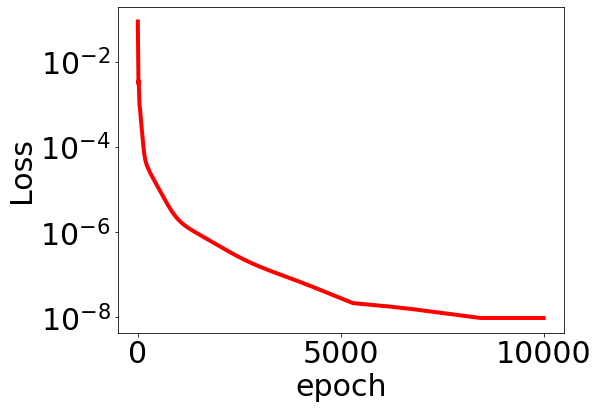

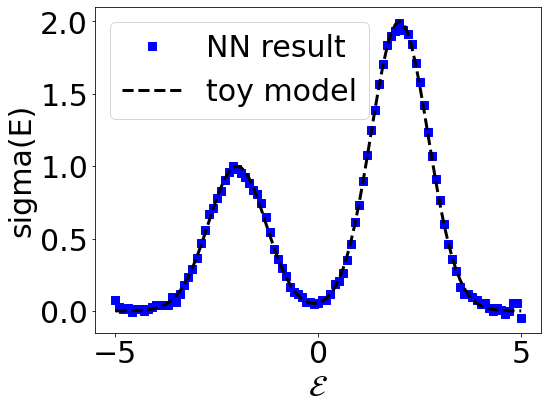

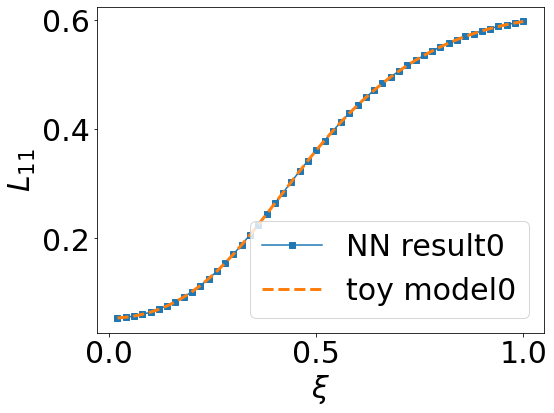

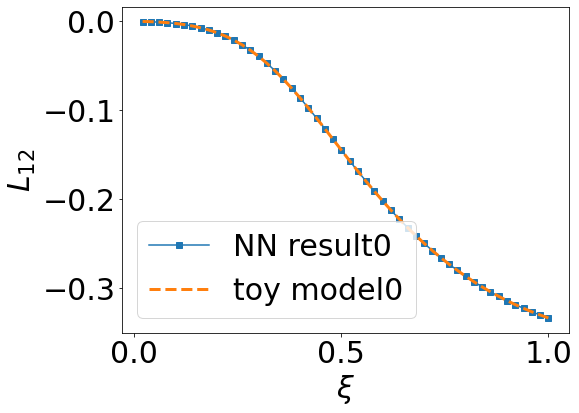

In [5]:
## result
%matplotlib inline
epoch=10000
sample=1
data1 = np.fromfile('./data/toy_cond_'+str(epoch)+'_'+str(sample)+'.dat', dtype=np.float64, count=1000)
data2 = np.fromfile('./data/toy_L11_L12_'+str(epoch)+'_'+str(sample)+'.dat', dtype=np.float64, count=sample*500)
data3= np.fromfile('./data/toy_loss_'+str(epoch)+'_'+str(sample)+'.dat', dtype=np.float64, count=2*epoch)
nsite=len(data1)//2
nsite2=len(data2)//(5*sample)
data1=data1.reshape(2,nsite)
data=data1
data2=data2.reshape(sample,5,nsite2)
plotter_toy(data1,data2,data3,sample)

## Toy model with Ns=3

Using device: cpu
[epoch 0 timing: ]
Elapsed: 3.1370723247528076
--------------------
[epoch 100 timing: ]
Elapsed: 2.8607115745544434
--------------------
[epoch 200 timing: ]
Elapsed: 2.7841429710388184
--------------------
[epoch 300 timing: ]
Elapsed: 2.948152780532837
--------------------
[epoch 400 timing: ]
Elapsed: 2.8340766429901123
--------------------
[epoch 500 timing: ]
Elapsed: 2.793107032775879
--------------------
[epoch 600 timing: ]
Elapsed: 2.8765294551849365
--------------------
[epoch 700 timing: ]
Elapsed: 2.8670589923858643
--------------------
[epoch 800 timing: ]
Elapsed: 2.7728984355926514
--------------------
[epoch 900 timing: ]
Elapsed: 2.821094036102295
--------------------
[epoch 1000 timing: ]
Elapsed: 2.9508285522460938
--------------------
[epoch 1100 timing: ]
Elapsed: 2.824157238006592
--------------------
[epoch 1200 timing: ]
Elapsed: 2.832118511199951
--------------------
[epoch 1300 timing: ]
Elapsed: 2.8481194972991943
--------------------
[epoc

<IPython.core.display.Javascript object>


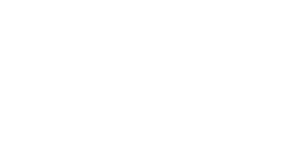

In [6]:
%matplotlib notebook
%run -i main_toy2.py

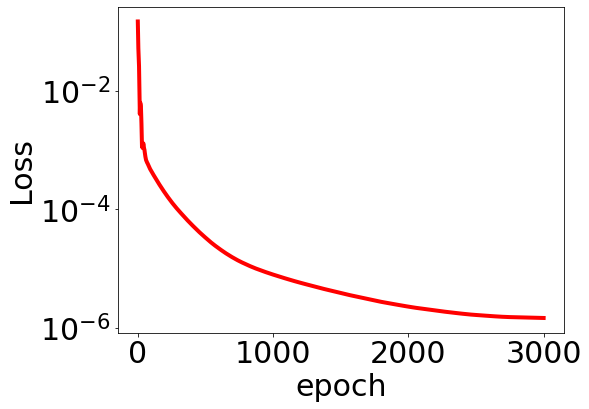

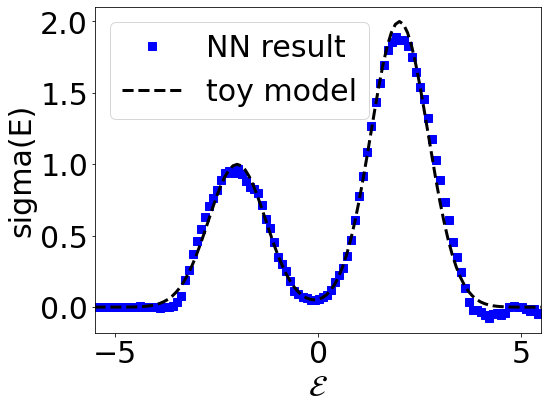

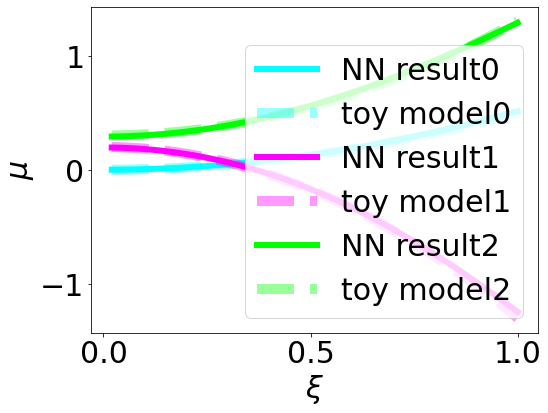

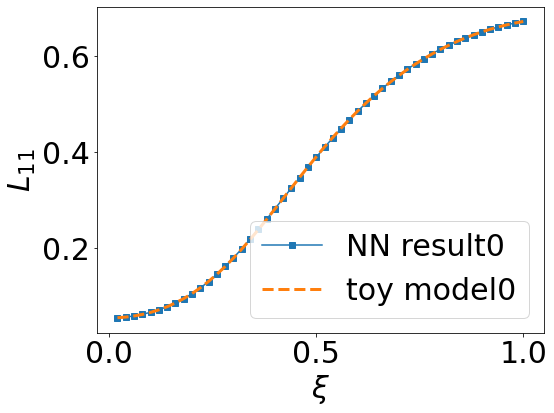

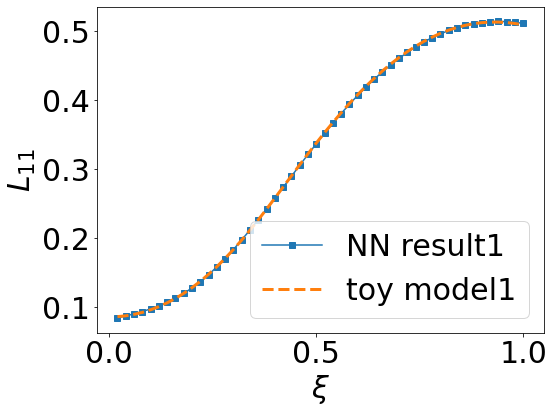

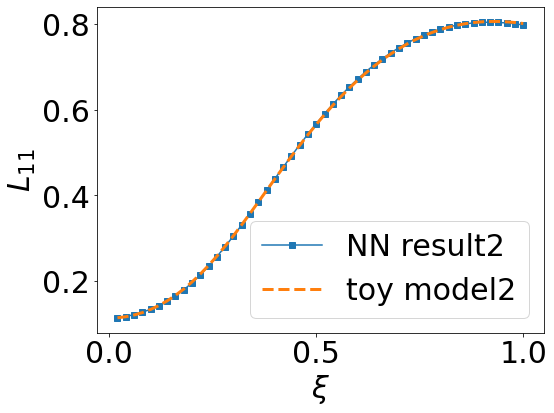

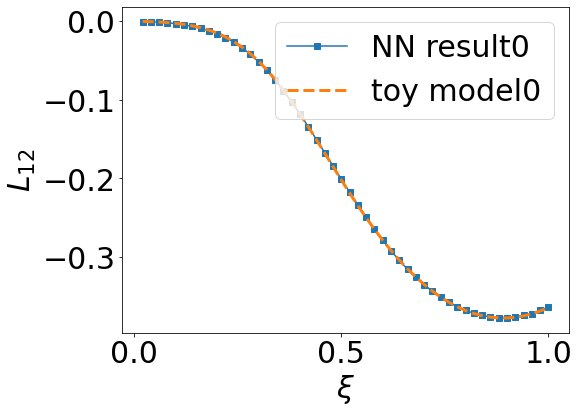

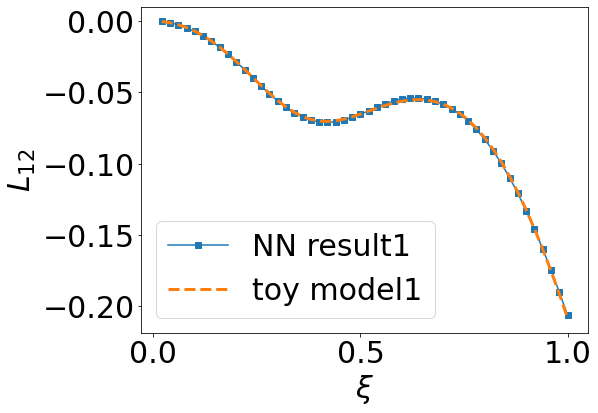

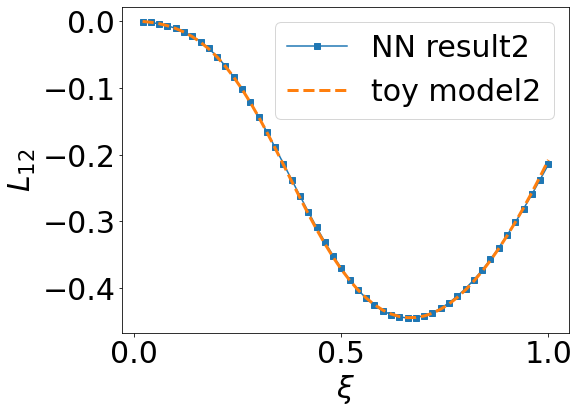

In [7]:
## result
%matplotlib inline
epoch=3000
sample=3
data1 = np.fromfile('./data/toy_cond_'+str(epoch)+'_'+str(sample)+'.dat', dtype=np.float64, count=1000)
data2 = np.fromfile('./data/toy_L11_L12_'+str(epoch)+'_'+str(sample)+'.dat', dtype=np.float64, count=sample*500)
data3= np.fromfile('./data/toy_loss_'+str(epoch)+'_'+str(sample)+'.dat', dtype=np.float64, count=2*epoch)
nsite=len(data1)//2
nsite2=len(data2)//(6*sample)
data1=data1.reshape(2,nsite)
data=data1
data2=data2.reshape(sample,6,nsite2)
plotter_toy(data1,data2,data3,sample)

# Experimental data of T. Inohara, \textit{et al.}, Appl. Phys. Lett. \textbf{110}, 183901 (2017)

## Ns=1 (Section III A of the paper )

Using device: cpu
[epoch 0 timing: ]
Elapsed: 2.644559621810913
--------------------
[epoch 100 timing: ]
Elapsed: 2.4469683170318604
--------------------
[epoch 200 timing: ]
Elapsed: 2.464489698410034
--------------------
[epoch 300 timing: ]
Elapsed: 2.4448091983795166
--------------------
[epoch 400 timing: ]
Elapsed: 2.4457809925079346
--------------------
[epoch 500 timing: ]
Elapsed: 2.428879737854004
--------------------
[epoch 600 timing: ]
Elapsed: 2.437971591949463
--------------------
[epoch 700 timing: ]
Elapsed: 2.4097201824188232
--------------------
[epoch 800 timing: ]
Elapsed: 2.4663422107696533
--------------------
[epoch 900 timing: ]
Elapsed: 2.468418836593628
--------------------
[epoch 1000 timing: ]
Elapsed: 2.9895102977752686
--------------------
[epoch 1100 timing: ]
Elapsed: 2.49969220161438
--------------------
[epoch 1200 timing: ]
Elapsed: 2.476196050643921
--------------------
[epoch 1300 timing: ]
Elapsed: 2.450681686401367
--------------------
[epoch 14

<IPython.core.display.Javascript object>


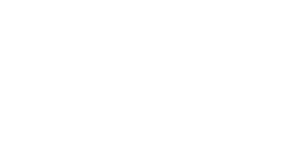

In [8]:
%matplotlib notebook
%run -i main_exp_single.py

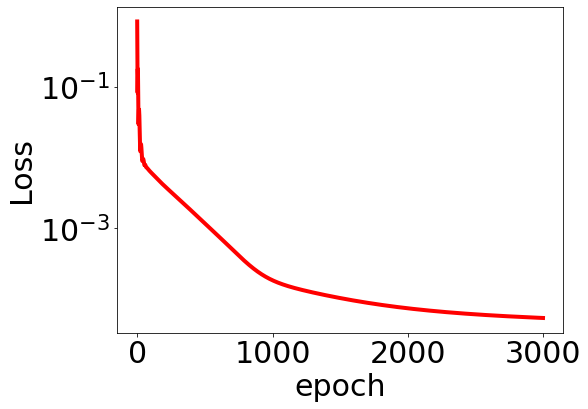

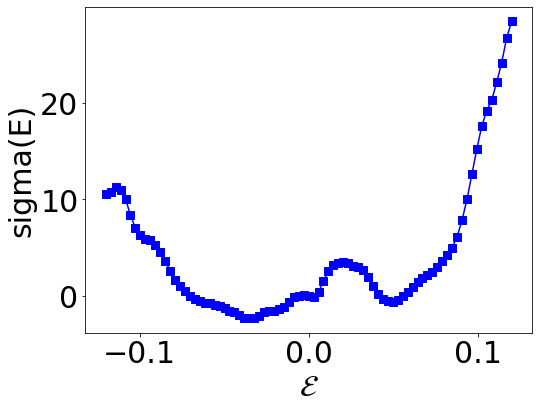

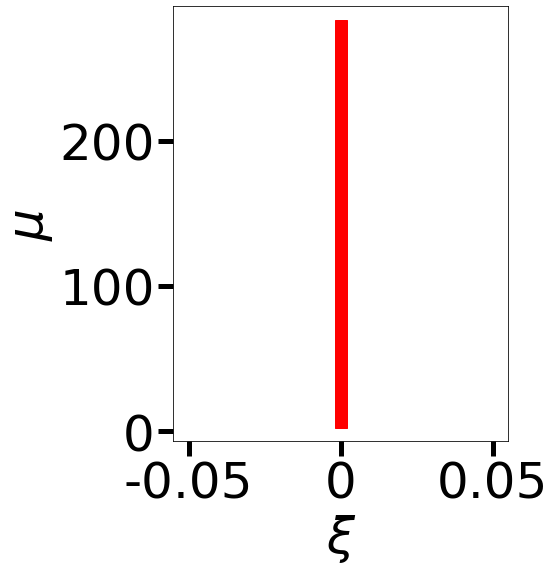

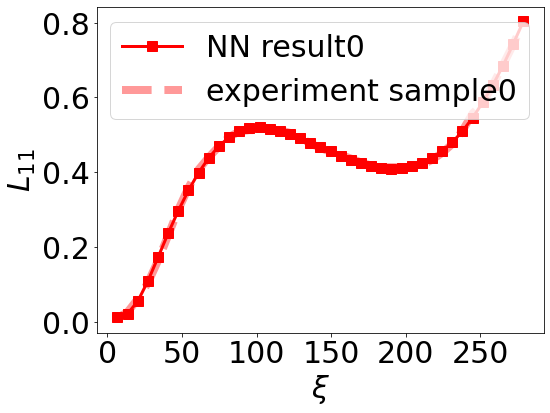

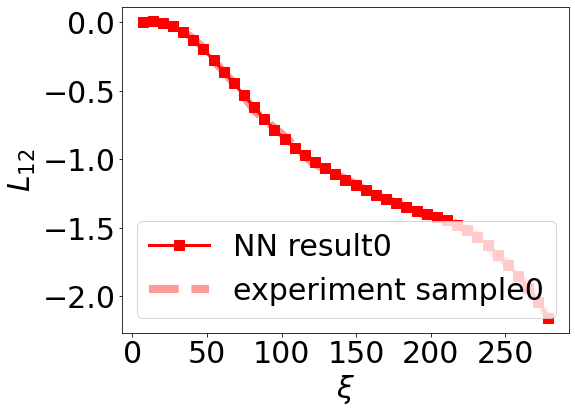

In [9]:
## result
%matplotlib inline
epoch=3000
sample=1
Wc=5
x=0
y=0
data1 = np.fromfile('./data/exp_single_cond_'+str(int(1000*x))+'_'+str(int(1000*y))+'_'+str(epoch)+'.dat', dtype=np.float64, count=1000)
data2 = np.fromfile('./data/exp_single_L11_L12_'+str(int(1000*x))+'_'+str(int(1000*y))+'_'+str(epoch)+'.dat', dtype=np.float64, count=sample*500)
data3= np.fromfile('./data/exp_single_loss_'+str(int(1000*x))+'_'+str(int(1000*y))+'_'+str(epoch)+'.dat', dtype=np.float64, count=2*epoch)
name='exp_single_'+str(int(1000*x))+'_'+str(int(1000*y))+'_'
nsite=len(data1)//2
nsite2=len(data2)//(6*sample)
data1=data1.reshape(2,nsite)
data=data1
data2=data2.reshape(sample,6,nsite2)
plotter(data1,data2,data3,sample,Wc,name)

## Ns=7 (Section III B of the paper )

Using device: cpu
[epoch 0 timing: ]
Elapsed: 3.1672778129577637
--------------------
[epoch 100 timing: ]
Elapsed: 2.9900803565979004
--------------------
[epoch 200 timing: ]
Elapsed: 2.9930596351623535
--------------------
[epoch 300 timing: ]
Elapsed: 2.9311513900756836
--------------------
[epoch 400 timing: ]
Elapsed: 3.0090794563293457
--------------------
[epoch 500 timing: ]
Elapsed: 3.0100998878479004
--------------------
[epoch 600 timing: ]
Elapsed: 2.921020269393921
--------------------
[epoch 700 timing: ]
Elapsed: 3.010162830352783
--------------------
[epoch 800 timing: ]
Elapsed: 2.995213508605957
--------------------
[epoch 900 timing: ]
Elapsed: 3.0341522693634033
--------------------
[epoch 1000 timing: ]
Elapsed: 3.0276825428009033
--------------------
[epoch 1100 timing: ]
Elapsed: 3.2440006732940674
--------------------
[epoch 1200 timing: ]
Elapsed: 2.9549996852874756
--------------------
[epoch 1300 timing: ]
Elapsed: 3.0541698932647705
--------------------
[ep

<IPython.core.display.Javascript object>


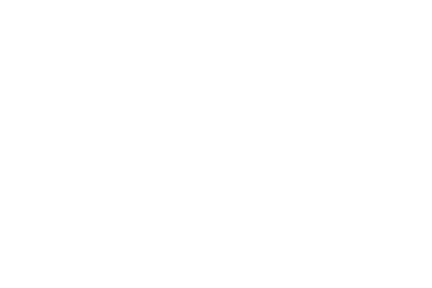

In [10]:
%matplotlib notebook
%run -i main_exp_all.py

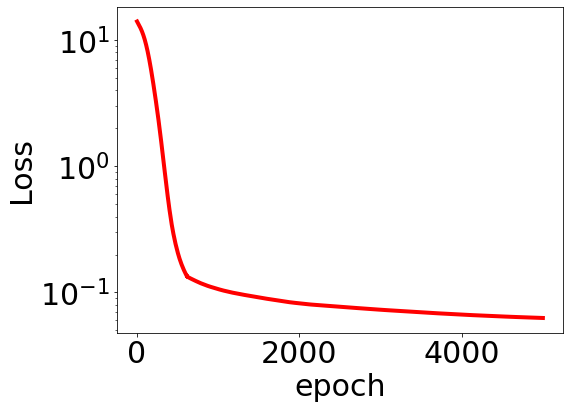

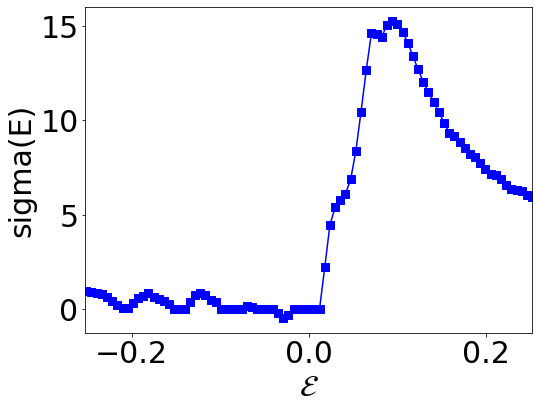

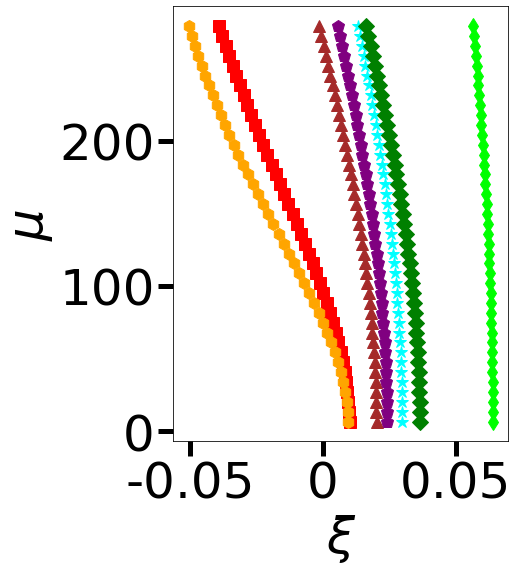

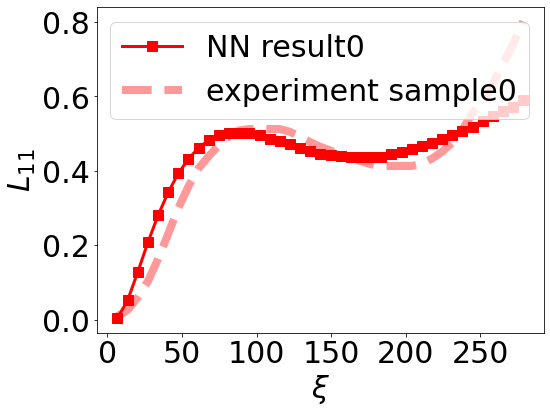

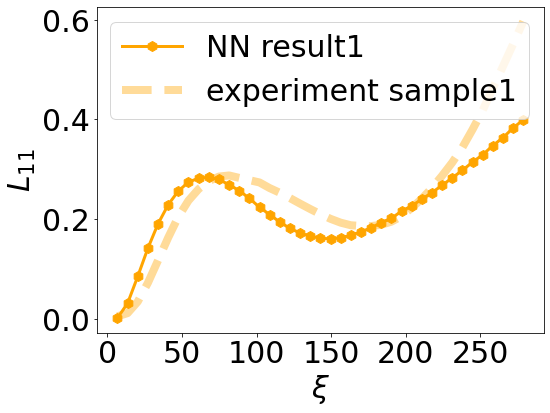

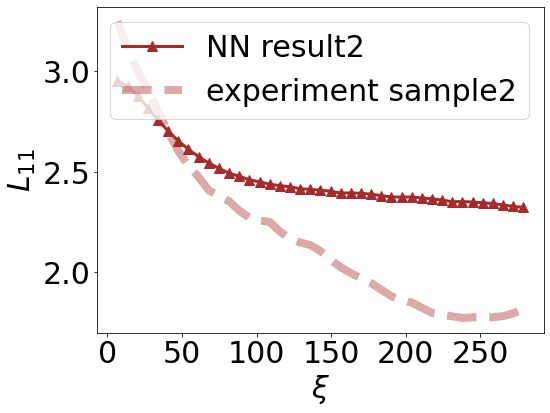

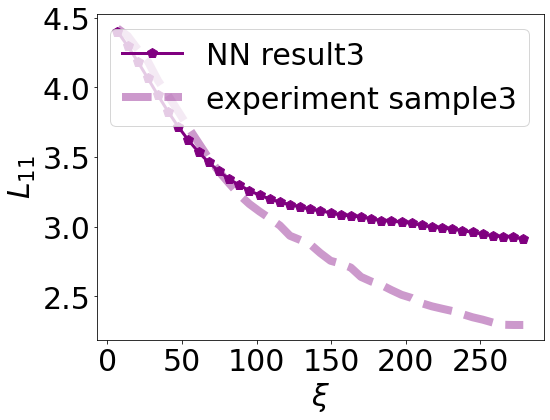

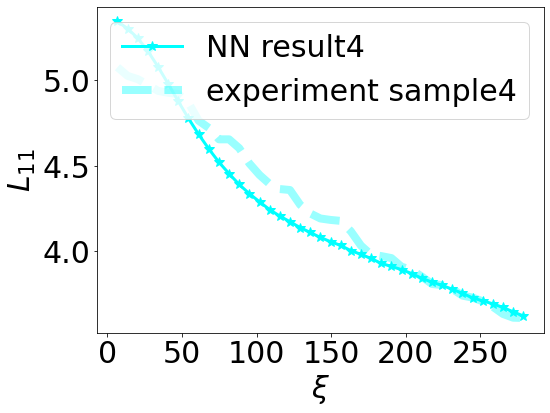

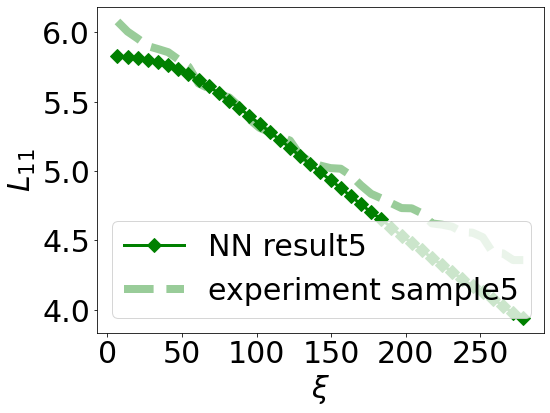

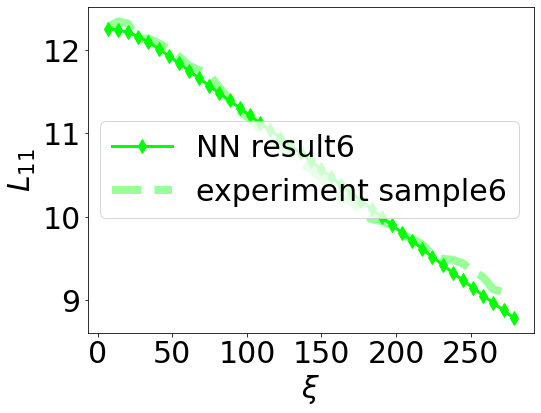

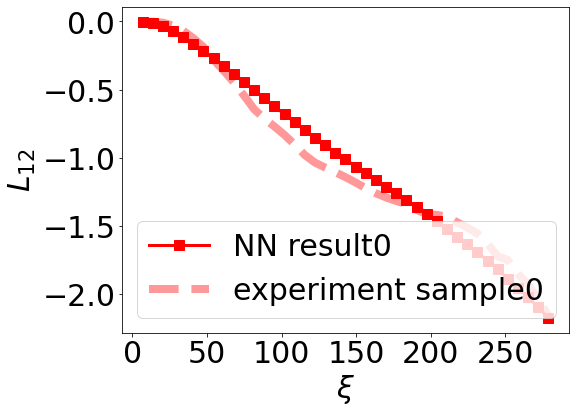

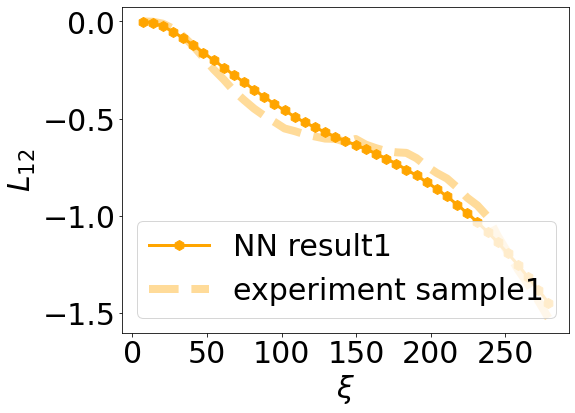

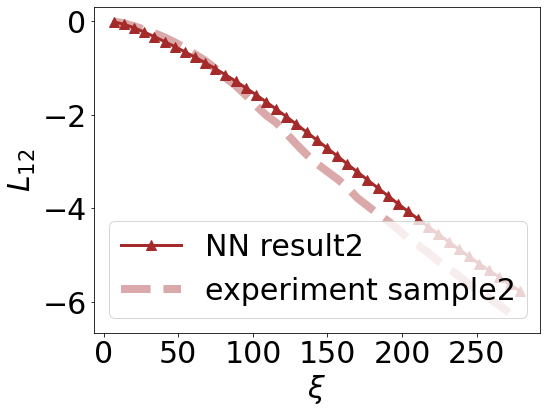

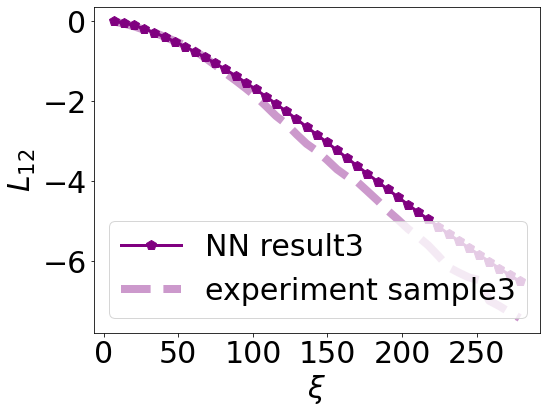

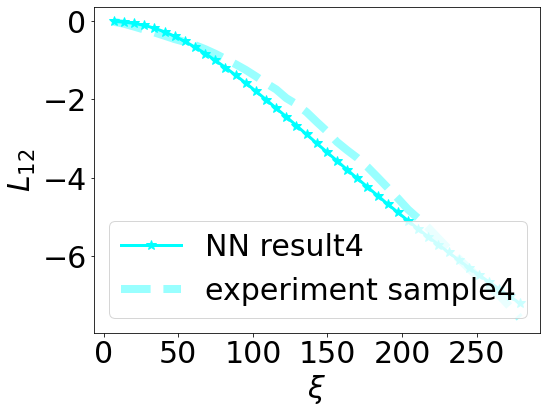

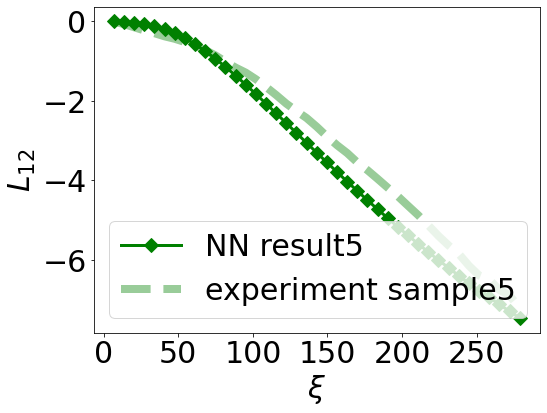

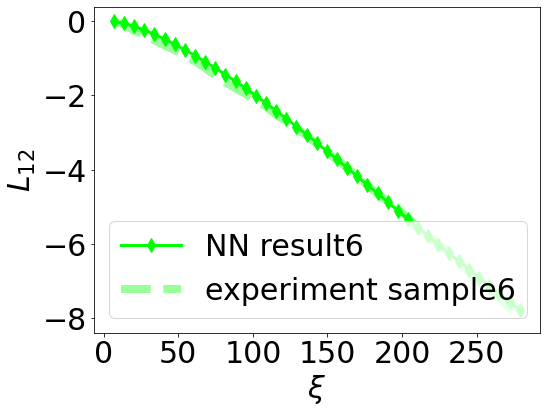

In [11]:
## result
%matplotlib inline
epoch=5000
sample=7
Wc=10
data1 = np.fromfile('./data/exp_all_cond_'+str(epoch)+'_'+str(sample)+'.dat', dtype=np.float64, count=1000)
data2 = np.fromfile('./data/exp_all_L11_L12_'+str(epoch)+'_'+str(sample)+'.dat', dtype=np.float64, count=sample*6*500)
data3=np.fromfile('./data/exp_all_loss_'+str(epoch)+'_'+str(sample)+'.dat', dtype=np.float64, count=sample*epoch)
name='exp_all_'
nsite=len(data1)//2
nsite2=len(data2)//(6*sample)
data1=data1.reshape(2,nsite)
data2=data2.reshape(sample,6,nsite2)
plotter(data1,data2,data3,sample,Wc,name)

## Ns=1 to optimise the NN for each sample (Section III C of the paper)

Using device: cpu
[epoch 0 timing: ]
Elapsed: 2.75917649269104
--------------------
[epoch 100 timing: ]
Elapsed: 2.544102191925049
--------------------
[epoch 200 timing: ]
Elapsed: 2.5570592880249023
--------------------
[epoch 300 timing: ]
Elapsed: 2.601127862930298
--------------------
[epoch 400 timing: ]
Elapsed: 2.566020965576172
--------------------
[epoch 500 timing: ]
Elapsed: 2.6161727905273438
--------------------
[epoch 600 timing: ]
Elapsed: 2.5399997234344482
--------------------
[epoch 700 timing: ]
Elapsed: 2.5850210189819336
--------------------
[epoch 800 timing: ]
Elapsed: 2.543754816055298
--------------------
[epoch 900 timing: ]
Elapsed: 2.520920753479004
--------------------
[epoch 1000 timing: ]
Elapsed: 2.5788116455078125
--------------------
[epoch 1100 timing: ]
Elapsed: 2.5628788471221924
--------------------
[epoch 1200 timing: ]
Elapsed: 2.5373897552490234
--------------------
[epoch 1300 timing: ]
Elapsed: 2.5447614192962646
--------------------
[epoch 

<IPython.core.display.Javascript object>


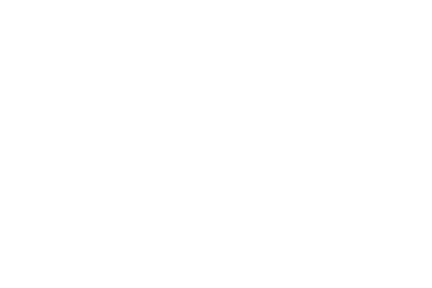

In [12]:
%matplotlib notebook
%run -i main_exp_focus.py

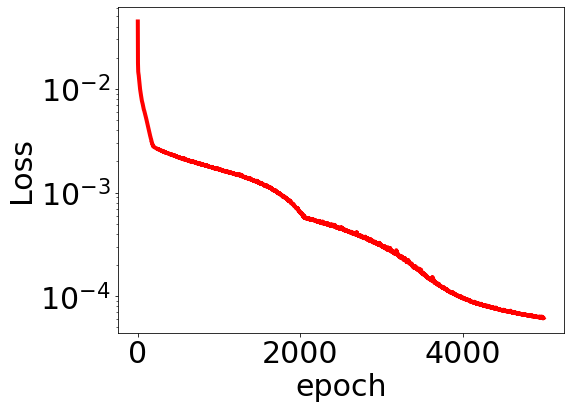

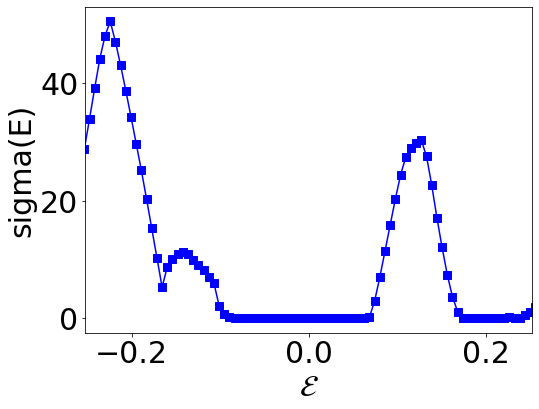

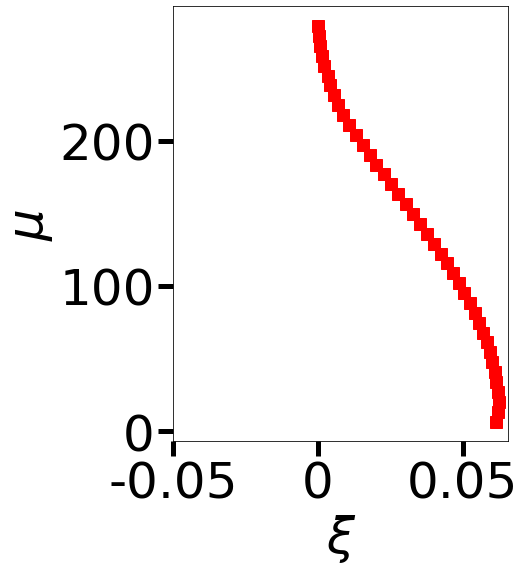

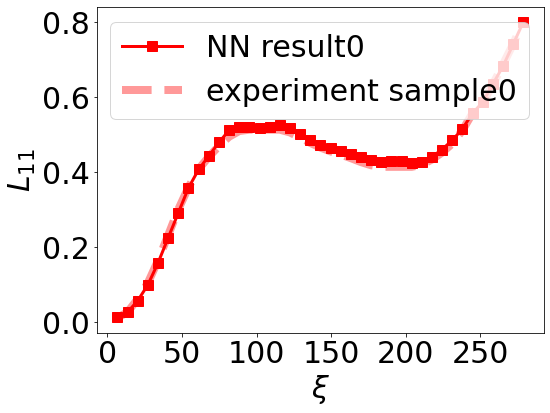

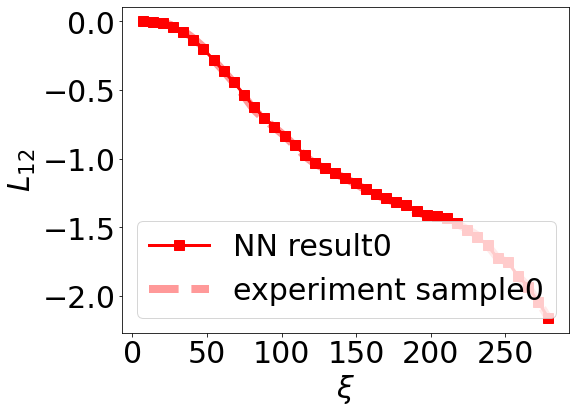

6.156545714475214e-05


In [13]:
## result
%matplotlib inline
epoch=5000
sample=1
Wc=10
x=0.0
y=0.0
Delta=0.04
data1 = np.fromfile('./data/exp_focus_cond_'+str(int(x*1000))+'_'+str(int(y*1000))+'_'+str(epoch)+'_delta_'+str(int(Delta*1000))+'.dat', dtype=np.float64, count=1000)
data2 = np.fromfile('./data/exp_focus_L11_L12_'+str(int(x*1000))+'_'+str(int(y*1000))+'_'+str(epoch)+'_delta_'+str(int(Delta*1000))+'.dat', dtype=np.float64, count=sample*6*500)
data3=np.fromfile('./data/exp_focus_loss_'+str(int(x*1000))+'_'+str(int(y*1000))+'_'+str(epoch)+'_delta_'+str(int(Delta*1000))+'.dat', dtype=np.float64, count=sample*epoch)
name='exp_focus'+str(int(1000*x))+'_'+str(int(1000*y))+'_delta_'+str(int(Delta*1000))+'_'
nsite=len(data1)//2
nsite2=len(data2)//(6*sample)
data1=data1.reshape(2,nsite)
data2=data2.reshape(sample,6,nsite2)
plotter(data1,data2,data3,sample,Wc,name)
print(data3[-1])